## Problem 4: What is the closest shopping center from your home / work? (5 points)

In the last problem you should find out the closest shopping center from two different locations a) your home and b) work place (or any two points in the Helsinki Region..).

**Steps**:

 - Create a txt-file called `activity_locations.txt` (use same formatting as in Problem 1) with two columns:
    - `id`: unique id for each row
    - `addr`:  address of your work and home (or any two addresses in the Helsinki Region.)
    
Save the text file into this repository.
    
 - Read those addresses using pandas and geocode the addresses.
 - Find out the nearest shopping center to these points using Shapely `nearest_points`.
 - Print out the name of the shopping center that is nearest to a) home and b) work. For example: `Shopping center closest to home: REDI`.

In [1]:
!pip install geopandas

In [2]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [3]:
fp = "activity_locations.txt"

# Read the data (replace "None" with your own code)
data = pd.read_csv(fp, sep=';')

In [4]:
data

,id,name,addr
0,1000,Spicy Hut,"Haapasaarentie 3, 00960 Helsinki, Finland"
1,1001,Sibelius Monument,"Sibeliuksen puisto, Mechelininkatu, 00250 Hels..."


In [5]:
!pip install geopy

In [6]:
#geocode activity locations
from geopandas.tools import geocode

# Geocode the addresses using Nominatim
geo = geo = geocode(data['addr'], provider='nominatim', user_agent='gislover', timeout=4)

In [7]:
# Check coordinate reference system information (re-project/define if needed)
geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
geo = geo.to_crs(epsg=3879)

In [9]:
geo.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
geo

,geometry,address
0,POINT (25508013.440 6678452.206),"3, Haapasaarentie, Keski-Vuosaari, Vuosaari, I..."
1,POINT (25495362.080 6674136.513),"Sibeliuksenpuisto, Mechelininkatu, Taka-Töölö,..."


In [11]:
# Join the tables
geodata = geo.join(data)

In [12]:
geodata

,geometry,address,id,name,addr
0,POINT (25508013.440 6678452.206),"3, Haapasaarentie, Keski-Vuosaari, Vuosaari, I...",1000,Spicy Hut,"Haapasaarentie 3, 00960 Helsinki, Finland"
1,POINT (25495362.080 6674136.513),"Sibeliuksenpuisto, Mechelininkatu, Taka-Töölö,...",1001,Sibelius Monument,"Sibeliuksen puisto, Mechelininkatu, 00250 Hels..."


In [13]:
# Find the closest shopping center for each activity location (closest shopping center from
# and closest shopping center from work) and print out the results:
fp1 = "shopping_centers.shp"

# Read the data (replace "None" with your own code)
shop = gpd.read_file(fp1)

In [14]:
shop

,address,id,name,addr,geometry
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1000,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland",POINT (25504598.602 6677662.109)
1,"Salaattiasema, 14-20, Mannerheimintie, Keskust...",1001,Forum,"Mannerheimintie 14?20, 00100 Helsinki, Finland",POINT (25496573.542 6672878.360)
2,"Sports Academy, 11, Piispansilta, Matinkylän k...",1002,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (25485440.532 6672255.563)
3,"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",1003,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (25489491.076 6678322.265)
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",1004,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (25497943.932 6686656.982)
5,"Silta, 5, Hermannin rantatie, Verkkosaari, Kal...",1005,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",POINT (25498837.156 6674909.983)


In [15]:
shop.crs == geodata.crs

True

In [21]:
dest = MultiPoint(list(shop['geometry']))
orig = geodata.at[0,'geometry']
orig1 = geodata.at[1, 'geometry']

In [27]:
spicy_g = nearest_points(orig, dest)

sibelius_g = nearest_points(orig1, dest)

for idx, row in shop.iterrows():
    if row['geometry'] == spicy_g[1]:
        print('Closest shopping center is:', shop.at[idx,'name'])

Closest shopping center is: Itis


In [28]:
for idx, row in shop.iterrows():
    if row['geometry'] == sibelius_g[1]:
        print('Closest shopping center is:', shop.at[idx,'name'])

Closest shopping center is: Forum


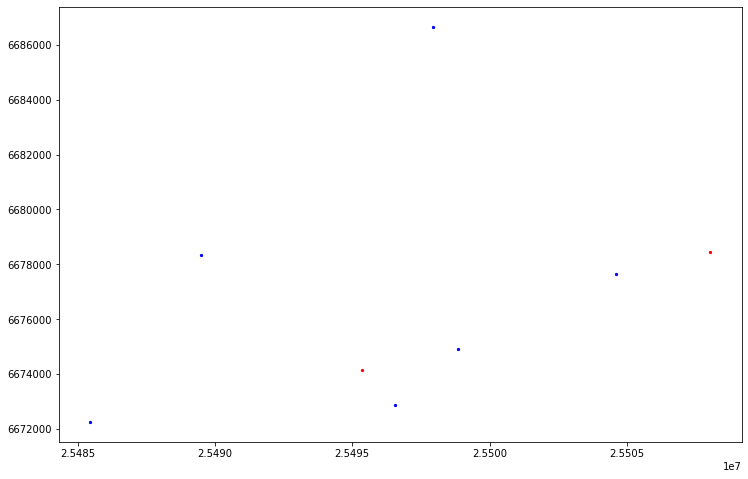

In [30]:
import matplotlib.pyplot as plt

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(15,8))

# Plot population grid
shop.plot(ax=ax, color='blue', markersize=7)

# Plot points
geo.plot(ax=ax, color='red', markersize=7)

Can you think of other application cases for the nearest neighbour analysis?

YOUR ANSWER HERE